In [20]:
pip install empath dlatk sqlalchemy psycopg2 pandas numpy tqdm


  Using cached psycopg2-2.9.11.tar.gz (379 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached numpy-1.25.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp310-cp310-macosx_10_9_x86_64.whl (20.8 MB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Created wheel for psycopg2: filename=psycopg2-2.9.11-cp310-cp310-macosx_10_13_x86_64.whl size=133678 sha256=fb1057f62805e0d287e7610662c39dd5876dbd25d7765c70c518f8a0c0bc370f
  Stored in directory: /Users/harjaap/Library/Caches/pip/wheels/ef/c7/1c/9c6a8c0c80fc6713248040b66f381cbd07b64ef067ceba5da2
Successfully built psycopg2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [numpy]
      Successfully uninstalled numpy-1.26.4━━━━━━━━━━━━━━━━━━━ 1/3 [numpy]
  Attem

In [21]:
pip install psycopg2


Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from empath import Empath
from tqdm import tqdm

# =============================
# 1. Load your dataset
# =============================
df = pd.read_csv("reddit_with_ekman_emotions.csv")

# confirm column names
print(df.columns)

# =============================
# 2. Initialize Empath
# =============================
lexicon = Empath()

# =============================
# 3. Generate Empath features
# =============================
tqdm.pandas()
empath_features = df['clean_text'].progress_apply(lambda x: lexicon.analyze(str(x), normalize=True))

# Convert to dataframe
empath_df = pd.DataFrame(list(empath_features))

# Combine original + Empath features
df_empath = pd.concat([df.reset_index(drop=True), empath_df.reset_index(drop=True)], axis=1)

# Save for next steps
df_empath.to_csv("reddit_empath_features.csv", index=False)
print("✅ Saved Empath features to reddit_empath_features.csv")


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/131260476.py:8: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_with_ekman_emotions.csv")


Index(['id', 'created_utc', 'subreddit', 'listing', 'title', 'selftext', 'url',
       'num_comments', 'comments', 'raw_text', 'clean_text', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'predicted_ekman_emotion',
       'emotion_confidence'],
      dtype='object')


100%|██████████| 43733/43733 [06:32<00:00, 111.29it/s]


✅ Saved Empath features to reddit_empath_features.csv


In [24]:
# compute top linguistic markers per emotion
top_features = emotion_means.apply(lambda x: x.nlargest(5).index.tolist())
for emotion, feats in top_features.items():
    print(f"\nTop linguistic markers for {emotion}: {', '.join(feats)}")



Top linguistic markers for anger: negative_emotion, hate, violence, pain, health

Top linguistic markers for disgust: negative_emotion, hate, violence, pain, ugliness

Top linguistic markers for fear: nervousness, negative_emotion, fear, pain, violence

Top linguistic markers for joy: positive_emotion, negative_emotion, health, optimism, friends

Top linguistic markers for neutral: health, death, communication, negative_emotion, vehicle

Top linguistic markers for sadness: negative_emotion, pain, violence, shame, suffering

Top linguistic markers for surprise: health, negative_emotion, nervousness, violence, pain


In [25]:
pip install pandas sqlalchemy psycopg2-binary


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas tqdm empath NRCLex nltk

In [33]:
import pandas as pd

# Replace with your dataset
df = pd.read_csv("reddit_with_ekman_emotions.csv")
text_col = "clean_text"  # or whichever your text column is


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/2355958790.py:4: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_with_ekman_emotions.csv")


In [34]:
from empath import Empath
from tqdm import tqdm

lexicon = Empath()

def extract_empath_features(text):
    try:
        return lexicon.analyze(text, normalize=True)
    except:
        return {}

tqdm.pandas()
df_empath = df[text_col].progress_apply(extract_empath_features)
df_empath = pd.DataFrame(df_empath.tolist())


100%|██████████| 43733/43733 [12:10<00:00, 59.85it/s]


In [ ]:
from nrclex import NRCLex

def extract_nrc_features(text):
    # handle non-string or NaN input
    if not isinstance(text, str) or text.strip() == "":
        return {}
    try:
        emo = NRCLex(text)
        scores = emo.raw_emotion_scores
        total = sum(scores.values()) or 1
        # Normalize like DLATK
        return {f"nrc_{k}": v/total for k, v in scores.items()}
    except Exception as e:
        print(f"Error processing text: {e}")
        return {}


In [ ]:
df_nrc = df[text_col].progress_apply(extract_nrc_features)
df_nrc = pd.DataFrame(df_nrc.tolist())


In [ ]:
# Merge NRC and Empath with your main dataset
df_features = pd.concat([df.reset_index(drop=True), 
                         df_empath.reset_index(drop=True), 
                         df_nrc.reset_index(drop=True)], axis=1)

# Save combined psycholinguistic features
df_features.to_csv("reddit_psycholinguistic_features.csv", index=False)

print("✅ Psycholinguistic feature table saved as reddit_psycholinguistic_features.csv")


In [ ]:
import nltk
nltk.download('punkt')

def text_stats(text):
    if not isinstance(text, str): return {"word_count": 0, "avg_sent_len": 0}
    words = nltk.word_tokenize(text)
    sents = nltk.sent_tokenize(text)
    return {
        "word_count": len(words),
        "avg_sent_len": len(words) / len(sents) if sents else 0
    }

df_textstats = df["clean_text"].progress_apply(text_stats)
df_textstats = pd.DataFrame(df_textstats.tolist())

# Merge to your main features
df_features = pd.concat([df_features, df_textstats], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df_features.select_dtypes(include=["float64", "int64"]).columns

scaler = StandardScaler()
df_features[numeric_cols] = scaler.fit_transform(df_features[numeric_cols])


In [ ]:
import pandas as pd

df_emotions = pd.read_csv("reddit_with_ekman_emotions.csv")
df_features = pd.read_csv("reddit_psycholinguistic_features.csv")

print("🔹 Emotion file columns:\n", df_emotions.columns.tolist())
print("🔹 Features file columns:\n", df_features.columns.tolist())


In [ ]:
df_combined = pd.merge(
    df_features,
    df_emotions[["clean_text", "predicted_ekman_emotion"]],
    on="clean_text",
    how="inner"
)

print("✅ Merged features with emotion predictions")
print(df_combined.shape)


In [35]:
import pandas as pd

df = pd.read_csv("reddit_psycholinguistic_features.csv")
print("✅ Loaded shape:", df.shape)
print(df[["predicted_ekman_emotion", "emotion_confidence"]].head())


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/2250251924.py:3: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_psycholinguistic_features.csv")


✅ Loaded shape: (43733, 224)
  predicted_ekman_emotion  emotion_confidence
0                 sadness            0.833457
1                 sadness            0.504654
2                surprise            0.817124
3                   anger            0.582970
4                 sadness            0.690031


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["predicted_ekman_emotion_encoded"] = le.fit_transform(df["predicted_ekman_emotion"])
print("✅ Encoded emotions:", dict(zip(le.classes_, le.transform(le.classes_))))



✅ Encoded emotions: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


In [37]:
corrs = df.corr(numeric_only=True)["predicted_ekman_emotion_encoded"].sort_values(ascending=False)
print(corrs.head(20))


predicted_ekman_emotion_encoded    1.000000
nrc_sadness                        0.085492
nrc_trust                          0.065060
shame                              0.060176
nrc_positive                       0.054800
health                             0.051047
contentment                        0.042607
injury                             0.041229
sadness                            0.039175
nrc_surprise                       0.036217
love                               0.035033
cold                               0.034074
neglect                            0.032158
confusion                          0.032070
nrc_anticipation                   0.031334
body                               0.030083
suffering                          0.028812
healing                            0.025150
white_collar_job                   0.021904
nrc_joy                            0.019663
Name: predicted_ekman_emotion_encoded, dtype: float64


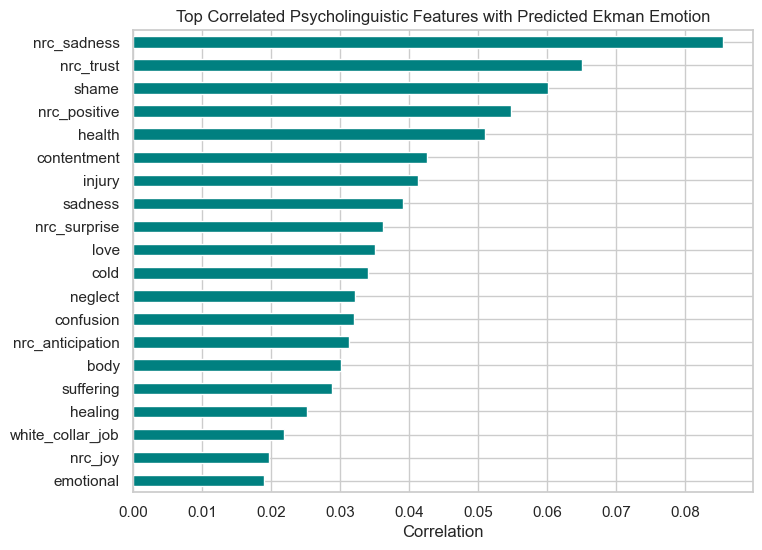

In [38]:
import matplotlib.pyplot as plt

top_corrs = corrs[1:21]  # skip the encoded emotion itself
top_corrs.plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Top Correlated Psycholinguistic Features with Predicted Ekman Emotion")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.show()


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your combined dataset
df = pd.read_csv("reddit_psycholinguistic_features.csv")

# Encode Ekman emotions numerically
le = LabelEncoder()
df["emotion_encoded"] = le.fit_transform(df["predicted_ekman_emotion"])

# Clean subreddit names (optional)
df["subreddit"] = df["subreddit"].str.lower().str.strip()

print("✅ Shape:", df.shape)
print("✅ Example emotions:", df["predicted_ekman_emotion"].unique())


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3962134689.py:5: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_psycholinguistic_features.csv")


✅ Shape: (43733, 225)
✅ Example emotions: ['sadness' 'surprise' 'anger' 'joy' 'neutral' 'fear' 'disgust']


In [ ]:
# Select only numeric columns (Empath + NRC + confidence + encoded label)
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()

# Focus on correlations with emotion
corr_emotion = corr["emotion_encoded"].sort_values(ascending=False)
corr_emotion.head(15)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_feats = corr_emotion[1:21]  # skip the encoded column itself
plt.figure(figsize=(8,6))
sns.barplot(x=top_feats.values, y=top_feats.index, palette="viridis")
plt.title("Top Psycholinguistic Features Correlated with Predicted Ekman Emotion")
plt.xlabel("Correlation with Emotion")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Aggregate mean of psycholinguistic features per subreddit
subreddit_features = (
    df.groupby("subreddit")
      .mean(numeric_only=True)
      .reset_index()
)

# Compute correlation between subreddits and emotion patterns
sub_corr = subreddit_features.set_index("subreddit").corr()["emotion_encoded"].sort_values(ascending=False)
print("Top subreddit-level correlations with emotion patterns:")
print(sub_corr.head(15))


In [ ]:
# Pivot: subreddits × Ekman emotions
pivot = (
    df.pivot_table(index="subreddit",
                   columns="predicted_ekman_emotion",
                   values="emotion_confidence",
                   aggfunc="mean")
)

plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap="coolwarm", center=0, annot=False)
plt.title("Average Emotion Confidence Across Subreddits")
plt.xlabel("Ekman Emotion")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---- Load existing pivot table ----
pivot = (
    df.pivot_table(index="subreddit",
                   columns="predicted_ekman_emotion",
                   values="emotion_confidence",
                   aggfunc="mean")
)

# ---- Filter subreddits with enough posts ----
counts = df["subreddit"].value_counts()
valid_subs = counts[counts >= 30].index  # keep subreddits with at least 30 posts
pivot = pivot.loc[pivot.index.isin(valid_subs)]

# ---- Normalize and sort for clarity ----
pivot = pivot.fillna(0)
pivot = pivot.loc[pivot.mean(axis=1).sort_values(ascending=False).index]  # sort by overall emotion level

# ---- Keep only top N subreddits (for readability) ----
top_n = 20
pivot_top = pivot.head(top_n)

# ---- Plot with improved formatting ----
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_top,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8}
)

plt.title(f"Average Emotion Confidence Across Top {top_n} Subreddits", fontsize=14, weight='bold')
plt.xlabel("Ekman Emotion", fontsize=12)
plt.ylabel("Subreddit", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
sns.clustermap(
    pivot_top,
    cmap="coolwarm",
    center=0,
    figsize=(10, 8),
    linewidths=0.4,
    annot=False
).fig.suptitle("Subreddit–Emotion Clustering", fontsize=14, y=1.02)
plt.show()


In [ ]:
from empath import Empath
lex = Empath()

# Optional: define once and persist to disk
lex.create_category("mental_health", ["depression","anxiety","therapy","suicide","panic","hopeless","counseling","psychologist"], model="reddit")
lex.create_category("help_seeking", ["help","support","advice","hotline","counsellor","psychiatrist"], model="reddit")


In [ ]:
import pandas as pd, numpy as np, re
from tqdm import tqdm
from empath import Empath
import spacy

# ===== CONFIG =====
IN_CSV  = "reddit_clean_data.csv"          # <- change to your file
TEXT_COLS = ["clean_text","selftext","raw_text","title"]  # fallback order
MIN_TOKENS = 5                             # drop super short posts for stability
NORMALIZE_UNITS = 100                      # per-100-words rates

# Load
df = pd.read_csv(IN_CSV)

# Choose text column in priority order
for c in TEXT_COLS:
    if c in df.columns:
        text_col = c
        break
else:
    raise ValueError("No suitable text column found.")

# Basic sanitization (strip URLs, extra whitespace)
url_pat = re.compile(r"http\S+|www\.\S+")
def basic_clean(s):
    s = re.sub(url_pat, "", str(s))
    # Keep punctuation; Empath is okay with raw text, but we’ll lemmatize below.
    return re.sub(r"\s+", " ", s).strip()

df[text_col] = df[text_col].map(basic_clean)

# Lemmatize (stabilizes counts and reduces sparsity)
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])
def lemmatize(doc):
    d = nlp(doc)
    toks = [t.lemma_.lower() for t in d if not (t.is_space or t.is_punct)]
    return " ".join(toks), len(toks)

df["proc_text"], df["n_tokens"] = zip(*df[text_col].map(lemmatize))
df = df[df["n_tokens"] >= MIN_TOKENS].copy()

# Empath setup (includes your custom categories if you created them)
lex = Empath()

# Decide which categories to compute:
# None => all built-ins + your customs. Or pass an explicit list for speed/repro.
categories = None  # e.g., ["affection","sadness","health","mental_health","help_seeking"]

# Score posts
def empath_scores(text):
    # normalize=True returns proportions (sum across categories <= 1)
    # we’ll convert to per-100-words below to make units comparable across posts
    return lex.analyze(text, categories=categories, normalize=True)

rows = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    sc = empath_scores(row["proc_text"])
    sc = {f"empath__{k}": v for k,v in sc.items()}
    sc["id"] = row.get("id", i)
    sc["subreddit"] = row.get("subreddit", None)
    sc["n_tokens"] = row["n_tokens"]
    rows.append(sc)

feats = pd.DataFrame(rows)

# Convert proportions to rates per 100 words (more interpretable)
em_cols = [c for c in feats.columns if c.startswith("empath__")]
for c in em_cols:
    feats[c] = feats[c] * NORMALIZE_UNITS

# Merge back anything you want to keep (timestamps, author, labels)
keep_cols = [c for c in df.columns if c in ["id","subreddit","author","created_utc"]]
out = feats.merge(df[keep_cols], on=["id","subreddit"], how="left")

out.to_csv("empath_per_post.csv", index=False)
print("Saved per-post Empath features → empath_per_post.csv")



In [ ]:
import spacy, sys, subprocess

def load_spacy_small():
    try:
        return spacy.load("en_core_web_sm", disable=["ner","parser"])
    except Exception:
        subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"], check=True)
        return spacy.load("en_core_web_sm", disable=["ner","parser"])

nlp = load_spacy_small()




In [ ]:
import pandas as pd
from scipy import stats

X = pd.read_csv("empath_per_post.csv")
em_cols = [c for c in X.columns if c.startswith("empath__")]

# drop weird rows
X = X.dropna(subset=em_cols).copy()
X = X[X["n_tokens"] >= 5]  # already done earlier, safe to keep

# add z-scores for plotting/heatmaps
for c in em_cols:
    X[c+"_z"] = stats.zscore(X[c], nan_policy="omit")

X.to_csv("empath_per_post_qc.csv", index=False)
print("OK → empath_per_post_qc.csv")


In [ ]:
import numpy as np, pandas as pd
from scipy import stats

X = pd.read_csv("empath_per_post_qc.csv")
em_cols = [c for c in X.columns if c.startswith("empath__") and not c.endswith("_z")]
X = X.dropna(subset=["subreddit"]).copy()

MIN_POSTS = 50  # raise to 50 if you have lots of data

def cohens_d(a, b):
    a, b = np.asarray(a), np.asarray(b)
    if len(a)<2 or len(b)<2: return np.nan
    s = np.sqrt(((len(a)-1)*a.var(ddof=1)+(len(b)-1)*b.var(ddof=1))/(len(a)+len(b)-2))
    return 0. if s==0 else (a.mean()-b.mean())/s

rows = []
for sub, g in X.groupby("subreddit"):
    if len(g) < MIN_POSTS: 
        continue
    rest = X[X["subreddit"]!=sub]
    row = {"subreddit": sub, "n_posts": len(g)}
    for c in em_cols:
        row[c+"_mean"] = g[c].mean()
        row[c+"_d"]    = cohens_d(g[c], rest[c])
        row[c+"_p"]    = stats.ttest_ind(g[c], rest[c], equal_var=False, nan_policy="omit").pvalue
    rows.append(row)

S = pd.DataFrame(rows)

# Benjamini–Hochberg FDR across all tests
p_cols   = [c for c in S.columns if c.endswith("_p")]
pvals    = S[p_cols].to_numpy().ravel()
order    = np.argsort(pvals); ranks = np.empty_like(order); ranks[order]=np.arange(1,len(pvals)+1)
fdr_cut  = (ranks/len(pvals))*0.05
sig_mask = pvals <= fdr_cut
sig_df   = pd.DataFrame(sig_mask.reshape(S[p_cols].shape), columns=[c.replace("_p","_sig") for c in p_cols])

S = pd.concat([S.drop(columns=p_cols), sig_df], axis=1)
S.to_csv("empath_by_subreddit_effects.csv", index=False)
print("OK → empath_by_subreddit_effects.csv")


In [ ]:
import pandas as pd, numpy as np

E = pd.read_csv("empath_by_subreddit_effects.csv")
d_cols   = [c for c in E.columns if c.startswith("empath__") and c.endswith("_d")]
sig_cols = [c for c in E.columns if c.endswith("_sig")]

rows=[]
for _, r in E.iterrows():
    d = r[d_cols]; sig = r[sig_cols].values.astype(bool)
    d = d.where(sig, np.nan)               # keep only significant
    top = d.abs().sort_values(ascending=False).head(10)
    for col, val in top.items():
        if pd.isna(val): continue
        cat = col.replace("empath__","").replace("_d","")
        rows.append({"subreddit": r["subreddit"], "category": cat, "cohens_d": val, "direction": "↑" if val>0 else "↓"})

pd.DataFrame(rows).to_csv("empath_top10_per_subreddit.csv", index=False)
print("OK → empath_top10_per_subreddit.csv")


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# your emotion file must have the same 'id' (or merge key)
emo = pd.read_csv("reddit_emotion_roberta.csv")     # change to your file
X   = pd.read_csv("empath_per_post_qc.csv")

# choose emotion columns (binary or probs). Example:
emo_cols = [c for c in emo.columns if c.startswith("emo_") or c in ["anger","sadness","joy","fear"]]
merged  = X.merge(emo[["id"]+emo_cols], on="id", how="inner")

empath_cols = [c for c in merged.columns if c.startswith("empath__") and not c.endswith("_z")]

# Spearman correlations (robust for non-normal)
rows=[]
for e in emo_cols:
    for c in empath_cols:
        rho, p = spearmanr(merged[e], merged[c], nan_policy="omit")
        rows.append({"emotion": e, "category": c.replace("empath__",""), "rho": rho, "p": p})

corrs = pd.DataFrame(rows)
corrs.to_csv("empath_x_emotion_correlations.csv", index=False)
print("OK → empath_x_emotion_correlations.csv")


In [ ]:
import pandas as pd, numpy as np
E = pd.read_csv("empath_by_subreddit_effects.csv")
edges=[]
for col in [c for c in E.columns if c.startswith("empath__") and c.endswith("_d")]:
    cat = col.replace("empath__","").replace("_d","")
    sig = E[col.replace("_d","_sig")].astype(bool)
    strong = E[col].abs() >= 0.5   # threshold; try 0.8 for “large”
    mask = sig & strong
    if mask.any():
        tmp = E.loc[mask, ["subreddit", col]]
        for _, r in tmp.iterrows():
            edges.append({"source": r["subreddit"], "target": cat, "weight": abs(r[col]), "sign": "pos" if r[col]>0 else "neg"})
pd.DataFrame(edges).to_csv("network_subreddit_empath_edges.csv", index=False)
print("OK → network_subreddit_empath_edges.csv")


In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from empath import Empath

# ============
# CONFIG
# ============
INPUT_CSV = "reddit_clean_data.csv"   # <-- change
OUTPUT_PER_POST = "reddit_empath_per_post.csv"
OUTPUT_BY_SUB = "reddit_empath_by_subreddit.csv"
TEXT_COL_CANDIDATES = ["clean_text", "selftext", "raw_text", "title"]
SUBREDDIT_COL = "subreddit"
ID_COL = "id"  # change if your id column is named differently

# Whether to normalize Empath counts by text length (0..1 proportion)
NORMALIZE = True
# Whether to ask Empath to lemmatize tokens (robust fallback below if it fails)
LEMMA = True

# ============
# LOAD DATA
# ============
df = pd.read_csv(INPUT_CSV)

# 1a) Pick a text column or build one
def pick_text_column(frame, candidates):
    cols_present = [c for c in candidates if c in frame.columns]
    if {"title", "selftext"}.issubset(frame.columns):
        # Prefer title + selftext if both exist
        txt = (frame["title"].fillna("") + " " + frame["selftext"].fillna("")).str.strip()
        if txt.str.len().gt(0).sum() > 0:
            return txt
    for c in cols_present:
        if frame[c].astype(str).str.strip().str.len().gt(0).sum() > 0:
            return frame[c].astype(str)
    # Fallback: try any string-like column
    raise ValueError("No suitable text column found. Please set TEXT_COL_CANDIDATES correctly.")

text_series = pick_text_column(df, TEXT_COL_CANDIDATES).fillna("").astype(str)

# 1b) Initialize Empath
lexicon = Empath()

# 1c) Safe Empath call (some systems may fail lemmatization if wordnet/other data missing)
def empath_analyze_safe(text, normalize=NORMALIZE, lemmatize=LEMMA):
    try:
        return lexicon.analyze(text, normalize=normalize, lemmatize=lemmatize)
    except Exception:
        # Fallback without lemmatization
        return lexicon.analyze(text, normalize=normalize, lemmatize=False)

# 1d) Run Empath in batches (for memory safety)
BATCH = 5000
records = []
empath_cols = None

for start in tqdm(range(0, len(df), BATCH), desc="Empath batches"):
    end = min(start + BATCH, len(df))
    chunk = text_series.iloc[start:end]
    out = [empath_analyze_safe(t) if isinstance(t, str) and t.strip() else {} for t in chunk]

    # On first batch, lock the column order
    if empath_cols is None:
        # union of keys across the first batch
        keys = set()
        for d in out:
            keys.update(d.keys())
        empath_cols = sorted(keys)

    # convert dicts -> list aligned with empath_cols
    out_rows = []
    for d in out:
        row = [d.get(k, 0.0) for k in empath_cols]
        out_rows.append(row)
    out_df = pd.DataFrame(out_rows, columns=empath_cols, index=chunk.index)
    records.append(out_df)

empath_df = pd.concat(records).fillna(0.0)

# 1e) Attach IDs and subreddit
# keep id if present; otherwise create a running index
if ID_COL in df.columns:
    empath_df.insert(0, ID_COL, df[ID_COL].values)
else:
    empath_df.insert(0, "row_id", np.arange(len(df)))

if SUBREDDIT_COL in df.columns:
    empath_df.insert(1, SUBREDDIT_COL, df[SUBREDDIT_COL].astype(str).values)

# 1f) Optional: z-score each Empath feature across posts (useful for EDA, not for raw features)
def zscore_cols(frame, cols):
    arr = frame[cols].values.astype(float)
    mu = arr.mean(axis=0)
    sd = arr.std(axis=0, ddof=0)
    sd[sd == 0] = 1.0
    z = (arr - mu) / sd
    out = pd.DataFrame(z, columns=[c + "_z" for c in cols], index=frame.index)
    return out

empath_z = zscore_cols(empath_df, empath_cols)
per_post = pd.concat([empath_df[[c for c in empath_df.columns if c not in empath_cols]], empath_df[empath_cols], empath_z], axis=1)

# 1g) Save per-post Empath
per_post.to_csv(OUTPUT_PER_POST, index=False)
print(f"Saved per-post Empath to {OUTPUT_PER_POST}\nShape: {per_post.shape}")


In [40]:
# pip install empath pandas numpy matplotlib scikit-learn
import re, os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from empath import Empath
from sklearn.preprocessing import StandardScaler

CSV = "/Users/harjaap/DS Project/sample/reddit_with_ekman_emotions.csv" 
TEXT_COLS = ["clean_text","proc_text","raw_text","selftext","title"]
MH_PRIOR = set("""sadness negative_emotion positive_emotion anger fear disgust anxiety depression
nervousness shame confusion affection optimism health mental_health medical_emergency pain injury
work achievement money violence suicide death family friends social_media communication
first_person self_reference""".split())

# --- load/clean ---
df = pd.read_csv(CSV)
text_col = next((c for c in TEXT_COLS if c in df.columns), None)
if not text_col: raise ValueError("No text column found.")
def basic_clean(s):
    s = str(s)
    s = re.sub(r"http\S+|www\.\S+|\S+@\S+"," ",s)
    s = re.sub(r"[^\x00-\x7F]+"," ",s)
    return re.sub(r"\s+"," ",s).strip()
df[text_col] = df[text_col].fillna("").map(basic_clean)
df = df[df[text_col].str.len()>3].copy()

# --- empath per post ---
lex = Empath()
E = pd.DataFrame(list(df[text_col].apply(lambda t: lex.analyze(t, normalize=True)))).fillna(0.0)

# --- keep only categories that exist in corpus and are MH-relevant or pass thresholds ---
coverage = (E>0).mean(0)                    # fraction of posts with nonzero score
means    = E.mean(0)                        # average proportion
mask = (coverage>=0.05) & (means>=0.003)    # data-driven relevance
# union with MH_PRIOR if present in output
present_prior = [c for c in MH_PRIOR if c in E.columns]
keep = sorted(set(E.columns[mask]) | set(present_prior))
keep = [c for c in keep if c in E.columns]  # ensure existence

E = E[keep].copy()
assert E.shape[1]>0, "All Empath categories were filtered out—lower thresholds or check your text."
print("Kept features:", E.columns.tolist())


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/2667085482.py:14: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV)
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105076230>>
Traceback (most recent call last):
  File "/Users/harjaap/anaconda3/envs/mentalbert/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Kept features: ['achievement', 'affection', 'anger', 'body', 'breaking', 'business', 'celebration', 'childish', 'children', 'cold', 'communication', 'confusion', 'contentment', 'death', 'disgust', 'domestic_work', 'emotional', 'family', 'fear', 'friends', 'giving', 'hate', 'healing', 'health', 'hearing', 'help', 'help_seeking', 'home', 'injury', 'listen', 'love', 'medical_emergency', 'meeting', 'mental_health', 'money', 'negative_emotion', 'neglect', 'nervousness', 'optimism', 'pain', 'party', 'phone', 'positive_emotion', 'sadness', 'shame', 'sleep', 'social_media', 'speaking', 'strength', 'suffering', 'swearing_terms', 'traveling', 'trust', 'violence', 'wedding', 'work']


In [ ]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empath import Empath
from sklearn.preprocessing import StandardScaler

CSV_PATH = "reddit_with_ekman_emotions.csv"  # <-- adjust if needed
OUT_DIR  = "/Users/harjaap/DS Project/sample/outputs"
os.makedirs(OUT_DIR, exist_ok=True)


In [44]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empath import Empath
from sklearn.preprocessing import StandardScaler

CSV_PATH = "bb_with_ekman_emotions.csv"  # <-- adjust if needed
OUT_DIR  = "/Users/harjaap/DS Project/sample/outputs"
os.makedirs(OUT_DIR, exist_ok=True)


In [45]:
# Use low_memory=False to avoid DtypeWarning fragmentation during parse
df = pd.read_csv(CSV_PATH, low_memory=False)
print("Loaded shape:", df.shape)
print("Columns (first 30):", df.columns[:30].tolist())


Loaded shape: (12000, 11)
Columns (first 30): ['keyword', 'page', 'post_preview', 'thread_url', 'post_date', 'num_comments', 'comments', 'raw_text', 'clean_text', 'predicted_ekman_emotion', 'emotion_confidence']


In [46]:
TEXT_COLS = ["clean_text","proc_text","raw_text","selftext","title","text"]
text_col = next((c for c in TEXT_COLS if c in df.columns), None)
if not text_col:
    raise ValueError(f"No text column found. Available: {df.columns.tolist()}")

def clean_text(s: str) -> str:
    s = str(s)
    s = re.sub(r"http\S+|www\.\S+|\S+@\S+", " ", s)   # URLs/emails
    s = re.sub(r"[^\x00-\x7F]+", " ", s)              # emojis/non-ascii
    s = re.sub(r"\s+", " ", s).strip()
    return s

df[text_col] = df[text_col].fillna("").map(clean_text)
df = df[df[text_col].str.len() > 3].copy()
print("After cleaning:", df.shape, " using text column:", text_col)


After cleaning: (12000, 11)  using text column: clean_text


In [47]:
lex = Empath()
E_all = pd.DataFrame(list(df[text_col].apply(lambda t: lex.analyze(t, normalize=True)))).fillna(0.0)
print("Empath feature count:", E_all.shape[1])


Empath feature count: 196


In [48]:
CAUSE_FEATURES = [
    "work","money","family","friends","violence","injury","pain","health",
    "mental_health","medical_emergency","death","neglect","domestic_work",
    "help_seeking","traveling","home","communication","social_media",
    "healing","swearing_terms"
]

keep_feats = [c for c in CAUSE_FEATURES if c in E_all.columns]
if not keep_feats:
    raise ValueError("None of the stressor features found in Empath output.")
E = E_all[keep_feats].copy()
print("Kept stressor-related features:", keep_feats)


Kept stressor-related features: ['work', 'money', 'family', 'friends', 'violence', 'injury', 'pain', 'health', 'mental_health', 'medical_emergency', 'death', 'neglect', 'domestic_work', 'help_seeking', 'traveling', 'home', 'communication', 'social_media', 'healing', 'swearing_terms']


In [49]:
low_var = [c for c in E.columns if E[c].var() <= 1e-6]
if low_var:
    E = E.drop(columns=low_var)
    print("Dropped near-constant:", low_var)
else:
    print("No near-constant features dropped.")


No near-constant features dropped.


In [50]:
Z = pd.DataFrame(StandardScaler().fit_transform(E), columns=[f"{c}__z" for c in E.columns])
out = pd.concat([df.reset_index(drop=True), E.reset_index(drop=True), Z.reset_index(drop=True)], axis=1)


In [51]:
save_path = os.path.join(OUT_DIR, "bb_empath_stressors_only.csv")
out.to_csv(save_path, index=False)
print("Saved →", save_path)


Saved → /Users/harjaap/DS Project/sample/outputs/bb_empath_stressors_only.csv


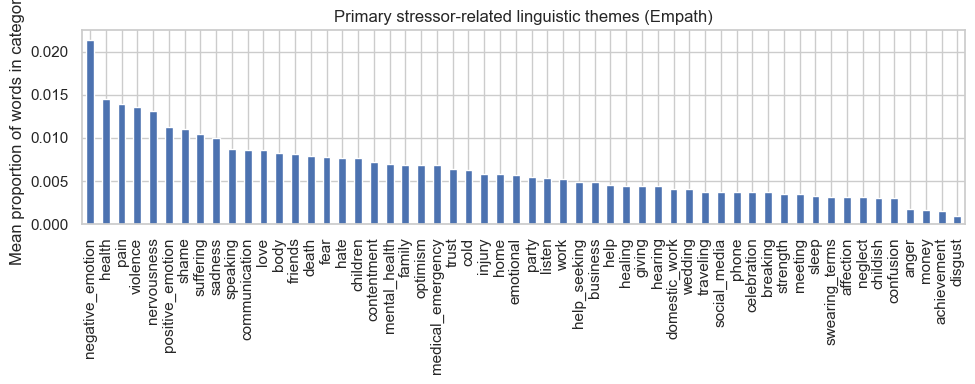

In [41]:
plt.figure(figsize=(10,4))
(E.mean().sort_values(ascending=False)).plot(kind="bar")
plt.title("Primary stressor-related linguistic themes (Empath)")
plt.ylabel("Mean proportion of words in category")
plt.tight_layout()
plt.show()


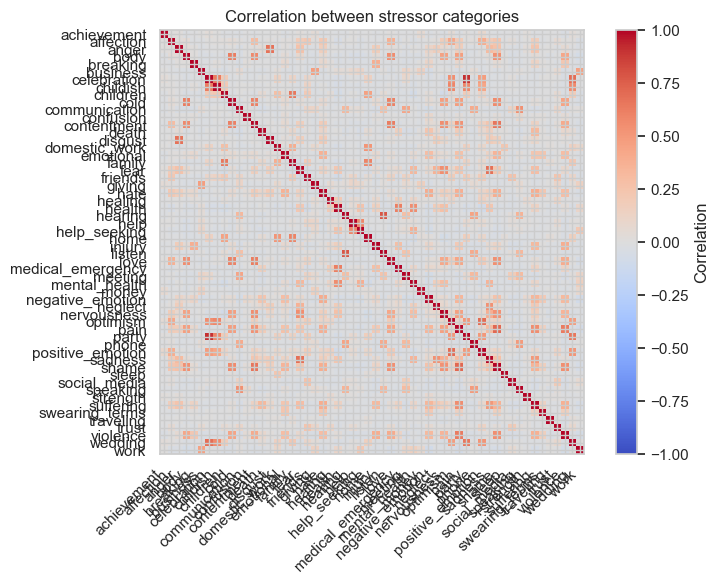

In [42]:
corr = E.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation between stressor categories")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# If you continued in the same session, `out` already exists.
# Otherwise, load the saved file from Step 8.
# out = pd.read_csv("/Users/harjaap/DS Project/sample/outputs/empath_stressors_only.csv", low_memory=False)

z_cols = [c for c in out.columns if c.endswith("__z")]
assert z_cols, "No standardized (__z) columns found. Rerun Step 7 to create z-scores."

X = out[z_cols].copy()

# Drop rows that are all zeros (or near-zero) across z-features (rare, but safe)
row_norm = np.linalg.norm(X.values, axis=1)
mask = row_norm > 1e-8
X = X[mask]
subset = out.loc[mask].reset_index(drop=True)
print("Clustering on shape:", X.shape)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = {}
for k in range(2, 9):  # try 2..8 clusters
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    lbl = km.fit_predict(X)
    sil[k] = silhouette_score(X, lbl)

print("Silhouette by K:", sil)
best_k = max(sil, key=sil.get)
print("Best K by silhouette:", best_k)


In [ ]:
K = best_k  # you can override if domain logic suggests (e.g., K=4)
km = KMeans(n_clusters=K, n_init=50, random_state=42)
labels = km.fit_predict(X)

subset["cluster"] = labels
centroids = pd.DataFrame(km.cluster_centers_, columns=z_cols, index=[f"cluster_{i}" for i in range(K)])
print("Centroids shape:", centroids.shape)


In [ ]:
def top_terms(row, n=5):
    s = row.sort_values(ascending=False)
    # remove the "__z" suffix for readability
    nice = [c.replace("__z","") for c in s.index[:n]]
    return ", ".join(nice)

cluster_names = centroids.apply(top_terms, axis=1, result_type="reduce")
cluster_names = cluster_names.to_dict()
cluster_names


In [ ]:
dom_idx = X.values.argmax(axis=1)
dom_stressor = [z_cols[i].replace("__z","") for i in dom_idx]

subset["dominant_stressor"] = dom_stressor
subset["cluster_name"] = subset["cluster"].map(lambda c: cluster_names[f"cluster_{c}"])

# Basic sanity table: which dominant stressors live in each cluster?
dom_summary = pd.crosstab(subset["cluster"], subset["dominant_stressor"]).sort_index()
dom_summary


In [ ]:
possible_user_cols = ["author","user","username","user_id"]
user_col = next((c for c in possible_user_cols if c in subset.columns), None)

if user_col:
    user_profiles = (subset.groupby(user_col)[z_cols].mean()
                             .assign(dominant=lambda df: df.idxmax(axis=1).str.replace("__z","")))
    user_profiles["cluster"] = (subset.groupby(user_col)["cluster"]
                                      .agg(lambda s: s.value_counts().idxmax()))
    user_profiles["cluster_name"] = user_profiles["cluster"].map(lambda c: cluster_names[f"cluster_{c}"])
    print("User-level profiles:", user_profiles.shape)
else:
    user_profiles = None
    print("No user/author column found; skipping user-level aggregation.")


In [ ]:
OUT_DIR = "/Users/harjaap/DS Project/sample/outputs"

subset.to_csv(os.path.join(OUT_DIR, "stressor_clusters_posts.csv"), index=False)
centroids.to_csv(os.path.join(OUT_DIR, "stressor_clusters_centroids_z.csv"))

if user_profiles is not None:
    user_profiles.to_csv(os.path.join(OUT_DIR, "stressor_clusters_users.csv"))

print("Saved post-level clusters and centroids to:", OUT_DIR)


In [ ]:
import pandas as pd

df_vader = pd.read_csv("reddit_sentiment_vader.csv")

def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

df_vader["vader_label"] = df_vader["compound"].apply(vader_label)
df_vader.head()


In [ ]:
import matplotlib.pyplot as plt

df_distil = pd.read_csv("reddit_sentiment_distilbert.csv")

# DistilBERT already has labels
distil_labels = df_distil["sentiment"]
vader_labels = df_vader["vader_label"]

# Percentages
vader_pct = vader_labels.value_counts(normalize=True) * 100
distil_pct = distil_labels.value_counts(normalize=True) * 100

plot_df = pd.DataFrame({
    "VADER": vader_pct,
    "DistilBERT": distil_pct
}).T[["NEGATIVE","NEUTRAL","POSITIVE"]]

plot_df.plot(kind="bar", figsize=(10,6))
plt.title("Overall Sentiment Distribution (VADER vs DistilBERT)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [ ]:
# Install dependencies

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Load your cleaned data
df = pd.read_csv("bb_posts_cleaned.csv")  # replace with your cleaned file
analyzer = SentimentIntensityAnalyzer()

# Function to compute VADER scores
def get_vader_scores(text):
    return analyzer.polarity_scores(str(text))  # returns dict with pos/neu/neg/compound

# Apply to dataset
tqdm.pandas()
df["vader_scores"] = df["clean_text"].progress_apply(get_vader_scores)

# Expand into separate columns
vader_df = df["vader_scores"].apply(pd.Series)
df = pd.concat([df, vader_df], axis=1)

# Save results
df.to_csv("bb_sentiment_vader.csv", index=False)

print(df.head())
     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1. Load both datasets
# --------------------------------------------------------
reddit = pd.read_csv("reddit_sentiment_vader.csv")
bb = pd.read_csv("bb_sentiment_vader.csv")

# --------------------------------------------------------
# 2. Fix BeyondBlue missing subreddit label
# --------------------------------------------------------
bb["subreddit"] = "BeyondBlue"

# --------------------------------------------------------
# 3. Define vader_label function
# --------------------------------------------------------
def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

# --------------------------------------------------------
# 4. Apply VADER labels
# --------------------------------------------------------
reddit["sentiment"] = reddit["compound"].apply(vader_label)
bb["sentiment"] = bb["compound"].apply(vader_label)

# --------------------------------------------------------
# 5. Combine datasets
# --------------------------------------------------------
df = pd.concat([reddit, bb], ignore_index=True)

# --------------------------------------------------------
# 6. Compute sentiment percentages per subreddit/platform
# --------------------------------------------------------
sent_dist = (
    df.groupby(["subreddit", "sentiment"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum() * 100)
      .unstack()
      .fillna(0)
)

# --------------------------------------------------------
# 7. Plot (clean stacked bar chart)
# --------------------------------------------------------
plt.figure(figsize=(14, 7))
sent_dist[["NEGATIVE", "NEUTRAL", "POSITIVE"]].plot(
    kind="bar", stacked=True, figsize=(14, 7), colormap="coolwarm"
)

plt.title("Sentiment Distribution Across Subreddits and Beyond Blue", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Subreddit", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

plt.show()


In [ ]:
["platform", "subreddit"]


In [ ]:
bb["subreddit"] = "BeyondBlue"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1. Load datasets
# --------------------------------------------------------
reddit = pd.read_csv("reddit_sentiment_vader.csv")
bb = pd.read_csv("bb_sentiment_vader.csv")

# --------------------------------------------------------
# 2. BeyondBlue FIX: use 'keyword' as 'subreddit'
# --------------------------------------------------------
bb["subreddit"] = bb["keyword"]

# --------------------------------------------------------
# 3. Define VADER label function
# --------------------------------------------------------
def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

# --------------------------------------------------------
# 4. Apply VADER labels
# --------------------------------------------------------
reddit["sentiment"] = reddit["compound"].apply(vader_label)
bb["sentiment"] = bb["compound"].apply(vader_label)

# --------------------------------------------------------
# 5. Add platform column
# --------------------------------------------------------
reddit["platform"] = "Reddit"
bb["platform"] = "BeyondBlue"

# --------------------------------------------------------
# 6. Combine both datasets
# --------------------------------------------------------
df = pd.concat([reddit, bb], ignore_index=True)

# Optional: clean unusual categories
df["subreddit"] = df["subreddit"].fillna("Unknown")

# --------------------------------------------------------
# 7. Compute sentiment percentages
# --------------------------------------------------------
sent_dist = (
    df.groupby(["subreddit", "sentiment"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x/x.sum() * 100)
      .unstack()
      .fillna(0)
)

# --------------------------------------------------------
# 8. Plot — CLEAN stacked bar chart
# --------------------------------------------------------
plt.figure(figsize=(14, 8))
sent_dist[["NEGATIVE", "NEUTRAL", "POSITIVE"]]()_


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1. Load datasets
# --------------------------------------------------------
reddit = pd.read_csv("reddit_sentiment_vader.csv")
bb = pd.read_csv("bb_sentiment_vader.csv")

# --------------------------------------------------------
# 2. BeyondBlue FIX: use 'keyword' as 'subreddit'
# --------------------------------------------------------
bb["subreddit"] = bb["keyword"]

# --------------------------------------------------------
# 3. Define VADER label function
# --------------------------------------------------------
def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

# --------------------------------------------------------
# 4. Apply VADER labels
# --------------------------------------------------------
reddit["sentiment"] = reddit["compound"].apply(vader_label)
bb["sentiment"] = bb["compound"].apply(vader_label)

# --------------------------------------------------------
# 5. Add platform column
# --------------------------------------------------------
reddit["platform"] = "Reddit"
bb["platform"] = "BeyondBlue"

# --------------------------------------------------------
# 6. Combine both datasets
# --------------------------------------------------------
df = pd.concat([reddit, bb], ignore_index=True)

# Optional: clean unusual categories
df["subreddit"] = df["subreddit"].fillna("Unknown")

# --------------------------------------------------------
# 7. Compute sentiment percentages
# --------------------------------------------------------
sent_dist = (
    df.groupby(["subreddit", "sentiment"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x/x.sum() * 100)
      .unstack()
      .fillna(0)
)

# --------------------------------------------------------
# 8. Plot — CLEAN stacked bar chart
# --------------------------------------------------------
plt.figure(figsize=(14, 8))
sent_dist[["NEGATIVE", "NEUTRAL", "POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    figsize=(14, 8),
    colormap="coolwarm"
)

plt.title("Sentiment Distribution Across Reddit Subreddits and Beyond Blue Categories", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Subreddit / BeyondBlue Category", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
bb["subreddit"] = "BeyondBlue"



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------
# Load datasets
# --------------------------------------------------------
reddit = pd.read_csv("reddit_sentiment_vader.csv")
bb = pd.read_csv("bb_sentiment_vader.csv")

# --------------------------------------------------------
# FIX: BeyondBlue is ONE category, not many
# --------------------------------------------------------
bb["subreddit"] = "BeyondBlue"

# --------------------------------------------------------
# Define VADER → sentiment label function
# --------------------------------------------------------
def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

reddit["sentiment"] = reddit["compound"].apply(vader_label)
bb["sentiment"] = bb["compound"].apply(vader_label)

reddit["platform"] = "Reddit"
bb["platform"] = "BeyondBlue"

df = pd.concat([reddit, bb], ignore_index=True)

# --------------------------------------------------------
# Group and compute sentiment percentages
# --------------------------------------------------------
sent_dist = (
    df.groupby(["subreddit", "sentiment"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x/x.sum()*100)
      .unstack()
      .fillna(0)
)

# --------------------------------------------------------
# Clean stacked bar chart
# --------------------------------------------------------
plt.figure(figsize=(12, 6))
sent_dist[["NEGATIVE","NEUTRAL","POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="coolwarm"
)

plt.title("Sentiment Distribution Across Reddit Subreddits and Beyond Blue", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
pd.read_csv("bb_sentiment_vader.csv")


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3572890851.py:7: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit = pd.read_csv("reddit_sentiment_vader.csv")
/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3572890851.py:57: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x/x.sum()*100)


<Figure size 1600x800 with 0 Axes>

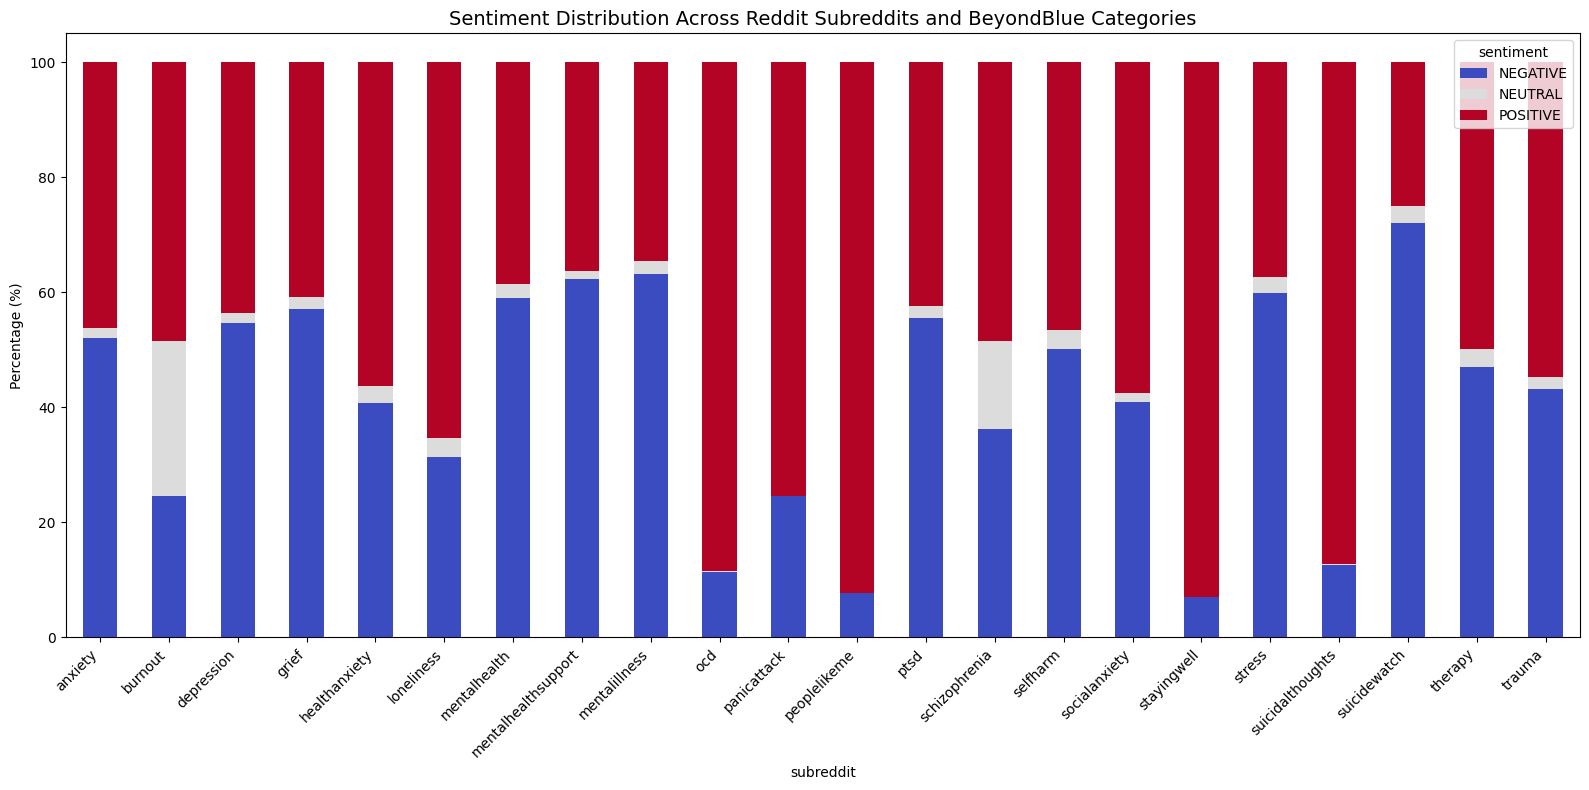

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------
# Load datasets
# --------------------------------------------------------
reddit = pd.read_csv("reddit_sentiment_vader.csv")
bb = pd.read_csv("bb_sentiment_vader.csv")

# --------------------------------------------------------
# Fix BeyondBlue: use keyword as category
# --------------------------------------------------------
bb["subreddit"] = bb["keyword"].str.lower().str.replace(" ", "")

# --------------------------------------------------------
# Clean Reddit subreddit names (optional)
# --------------------------------------------------------
reddit["subreddit"] = reddit["subreddit"].str.lower()

# Limit Reddit to your actual subreddits
VALID_SUBS = [
    "depression","stress","anxiety","burnout","grief","healthanxiety",
    "loneliness","mentalhealth","mentalhealthsupport","mentalillness",
    "ptsd","schizophrenia","selfharm","socialanxiety","suicidewatch",
    "therapy","trauma"
]

reddit = reddit[reddit["subreddit"].isin(VALID_SUBS)]

# --------------------------------------------------------
# VADER label function
# --------------------------------------------------------
def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

# Apply VADER labels
reddit["sentiment"] = reddit["compound"].apply(vader_label)
bb["sentiment"] = bb["compound"].apply(vader_label)

# --------------------------------------------------------
# Combine both datasets
# --------------------------------------------------------
df = pd.concat([reddit, bb], ignore_index=True)

# --------------------------------------------------------
# Compute sentiment percentages
# --------------------------------------------------------
sent_dist = (
    df.groupby(["subreddit", "sentiment"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x/x.sum()*100)
      .unstack()
      .fillna(0)
)

# Sort alphabetically
sent_dist = sent_dist.sort_index()

# --------------------------------------------------------
# Plot clean stacked bar chart
# --------------------------------------------------------
plt.figure(figsize=(16, 8))

sent_dist[["NEGATIVE","NEUTRAL","POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    colormap="coolwarm",
    figsize=(16, 8)
)

plt.title("Sentiment Distribution Across Reddit Subreddits and BeyondBlue Categories", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# VADER → label mapping function
def vader_label(x):
    if x > 0.05:
        return "POSITIVE"
    elif x < -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"


In [28]:
# ---- Load Reddit sentiment ----
reddit_v = pd.read_csv("reddit_sentiment_vader.csv")
reddit_d = pd.read_csv("reddit_sentiment_distilbert.csv")

# ---- Load BeyondBlue sentiment ----
bb_v = pd.read_csv("bb_sentiment_vader.csv")
bb_d = pd.read_csv("bb_sentiment_distilbert.csv")

# ---- Convert VADER into labels ----
reddit_v["label"] = reddit_v["compound"].apply(vader_label)
bb_v["label"] = bb_v["compound"].apply(vader_label)

# ---- DistilBERT already has labels ----
reddit_d["label"] = reddit_d["sentiment"]
bb_d["label"] = bb_d["sentiment"]

# ---- Compute % for each platform + model ----
def pct_table(df, platform, model):
    counts = df["label"].value_counts(normalize=True) * 100
    return pd.DataFrame({
        "Platform": platform,
        "Model": model,
        "Negative (%)": counts.get("NEGATIVE", 0),
        "Neutral (%)":  counts.get("NEUTRAL", 0),
        "Positive (%)": counts.get("POSITIVE", 0),
    }, index=[0])

t1 = pd.concat([
    pct_table(reddit_v, "Reddit", "VADER"),
    pct_table(reddit_d, "Reddit", "DistilBERT"),
    pct_table(bb_v,     "BeyondBlue", "VADER"),
    pct_table(bb_d,     "BeyondBlue", "DistilBERT"),
]).reset_index(drop=True)

t1


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/212058838.py:2: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_v = pd.read_csv("reddit_sentiment_vader.csv")
/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/212058838.py:3: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_d = pd.read_csv("reddit_sentiment_distilbert.csv")


,Platform,Model,Negative (%),Neutral (%),Positive (%)
0,Reddit,VADER,55.770242,6.370475,37.859282
1,Reddit,DistilBERT,85.073057,0.000000,14.926943
2,BeyondBlue,VADER,11.691667,0.116667,88.191667
3,BeyondBlue,DistilBERT,52.183333,0.000000,47.816667


In [29]:
print(t1.to_latex(index=False))


\begin{tabular}{llrrr}
\toprule
  Platform &      Model &  Negative (\%) &  Neutral (\%) &  Positive (\%) \\
\midrule
    Reddit &      VADER &     55.770242 &     6.370475 &     37.859282 \\
    Reddit & DistilBERT &     85.073057 &     0.000000 &     14.926943 \\
BeyondBlue &      VADER &     11.691667 &     0.116667 &     88.191667 \\
BeyondBlue & DistilBERT &     52.183333 &     0.000000 &     47.816667 \\
\bottomrule
\end{tabular}



/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/1899073983.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(t1.to_latex(index=False))


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3744066058.py:4: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit = pd.read_csv("reddit_sentiment_vader.csv")
/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3744066058.py:32: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x/x.sum()*100)


<Figure size 1600x800 with 0 Axes>

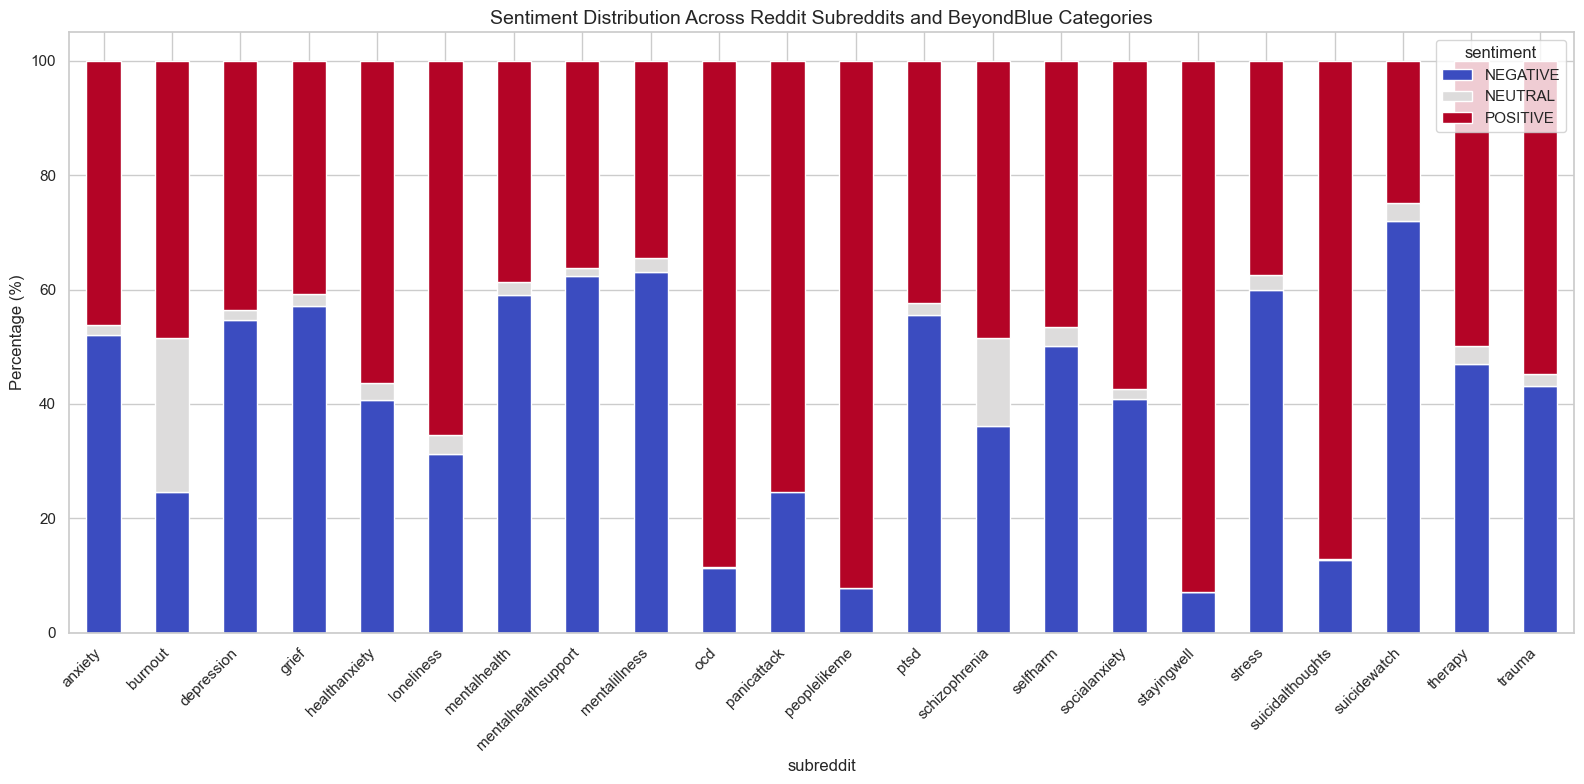

In [30]:
# -------------------------------
# Load datasets
# -------------------------------
reddit = pd.read_csv("reddit_sentiment_vader.csv")
bb = pd.read_csv("bb_sentiment_vader.csv")

# Fix BeyondBlue categories: use 'keyword'
bb["subreddit"] = bb["keyword"].str.lower().str.replace(" ", "")

# Clean Reddit
VALID_SUBS = [
    "depression","stress","anxiety","burnout","grief","healthanxiety",
    "loneliness","mentalhealth","mentalhealthsupport","mentalillness",
    "ptsd","schizophrenia","selfharm","socialanxiety","suicidewatch",
    "therapy","trauma"
]
reddit["subreddit"] = reddit["subreddit"].str.lower()
reddit = reddit[reddit["subreddit"].isin(VALID_SUBS)]

# Convert VADER to sentiment labels
reddit["sentiment"] = reddit["compound"].apply(vader_label)
bb["sentiment"] = bb["compound"].apply(vader_label)

# Combine
df = pd.concat([reddit, bb], ignore_index=True)

# Compute sentiment percentages per category
sent_dist = (
    df.groupby(["subreddit", "sentiment"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x/x.sum()*100)
      .unstack()
      .fillna(0)
      .sort_index()
)

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(16, 8))
sent_dist[["NEGATIVE","NEUTRAL","POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    colormap="coolwarm",
    figsize=(16, 8)
)

plt.title("Sentiment Distribution Across Reddit Subreddits and BeyondBlue Categories", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3661105307.py:2: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("reddit_sentiment_vader.csv")
/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3661105307.py:3: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("reddit_sentiment_distilbert.csv")


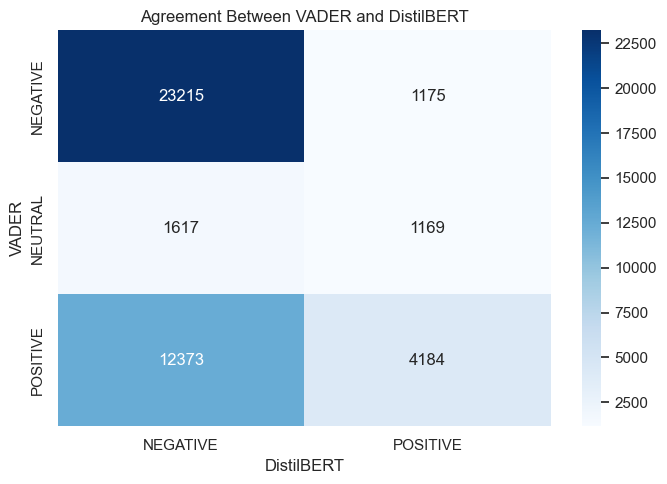

In [31]:
# Load predictions
v = pd.read_csv("reddit_sentiment_vader.csv")
d = pd.read_csv("reddit_sentiment_distilbert.csv")

# Convert VADER → label
v["label"] = v["compound"].apply(vader_label)

# Align lengths if needed
min_len = min(len(v), len(d))
v_labels = v["label"].iloc[:min_len]
d_labels = d["sentiment"].iloc[:min_len]

# Create confusion matrix
conf = pd.crosstab(v_labels, d_labels)

# -------------------------------
# Heatmap
# -------------------------------
plt.figure(figsize=(7, 5))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.title("Agreement Between VADER and DistilBERT")
plt.xlabel("DistilBERT")
plt.ylabel("VADER")
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")

# ============
# Load files
# ============
reddit = pd.read_csv("empath_stressors_only.csv")
bb     = pd.read_csv("bb_empath_stressors_only.csv")

# Add platform label
reddit["platform"] = "Reddit"
bb["platform"] = "BeyondBlue"

# Combine temporarily for analysis later
df = pd.concat([reddit, bb], ignore_index=True)

print(df.shape)
df["platform"].value_counts()


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/2064218089.py:11: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit = pd.read_csv("empath_stressors_only.csv")


(55100, 66)


Reddit        43100
BeyondBlue    12000
Name: platform, dtype: int64

In [57]:
empath_z_cols = [c for c in df.columns if c.endswith("_z")]

print("Empath z-score features:", len(empath_z_cols))
print(empath_z_cols[:20])


Empath z-score features: 20
['work__z', 'money__z', 'family__z', 'friends__z', 'violence__z', 'injury__z', 'pain__z', 'health__z', 'mental_health__z', 'medical_emergency__z', 'death__z', 'neglect__z', 'domestic_work__z', 'help_seeking__z', 'traveling__z', 'home__z', 'communication__z', 'social_media__z', 'healing__z', 'swearing_terms__z']


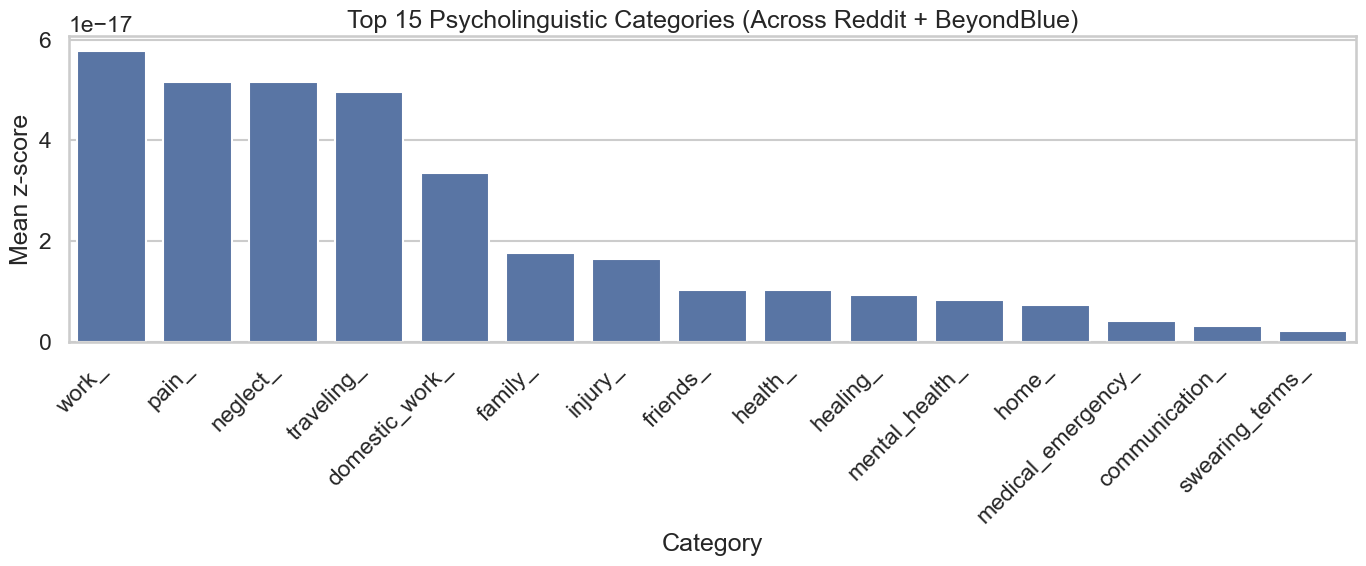

In [65]:
mean_z = df[empath_z_cols].mean().sort_values(ascending=False)

top_n = 15
top_mean = mean_z.head(top_n)

plt.figure(figsize=(14,6))
sns.barplot(x=top_mean.index.str.replace("_z",""), y=top_mean.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean z-score")
plt.xlabel("Category")
plt.title("Top 15 Psycholinguistic Categories (Across Reddit + BeyondBlue)")
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

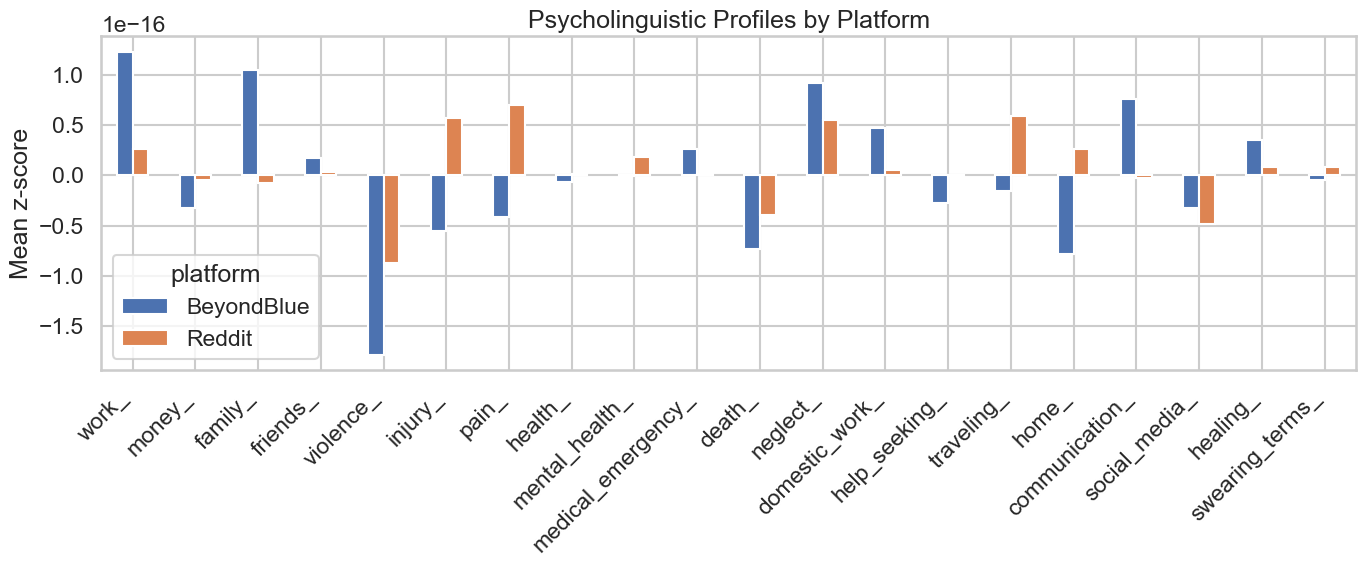

In [59]:
platform_means = df.groupby("platform")[empath_z_cols].mean().T
platform_means.index = platform_means.index.str.replace("_z","")

plt.figure(figsize=(14,6))
platform_means.plot(kind="bar", figsize=(14,6))
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean z-score")
plt.title("Psycholinguistic Profiles by Platform")
plt.tight_layout()
plt.show()


In [60]:
ekman_cols = [c for c in df.columns if "ekman" in c.lower()]
print("Ekman column:", ekman_cols)

ekman_col = ekman_cols[0]

# One-hot encode Ekman emotion labels
ekman_dummies = pd.get_dummies(df[ekman_col])


Ekman column: ['predicted_ekman_emotion']


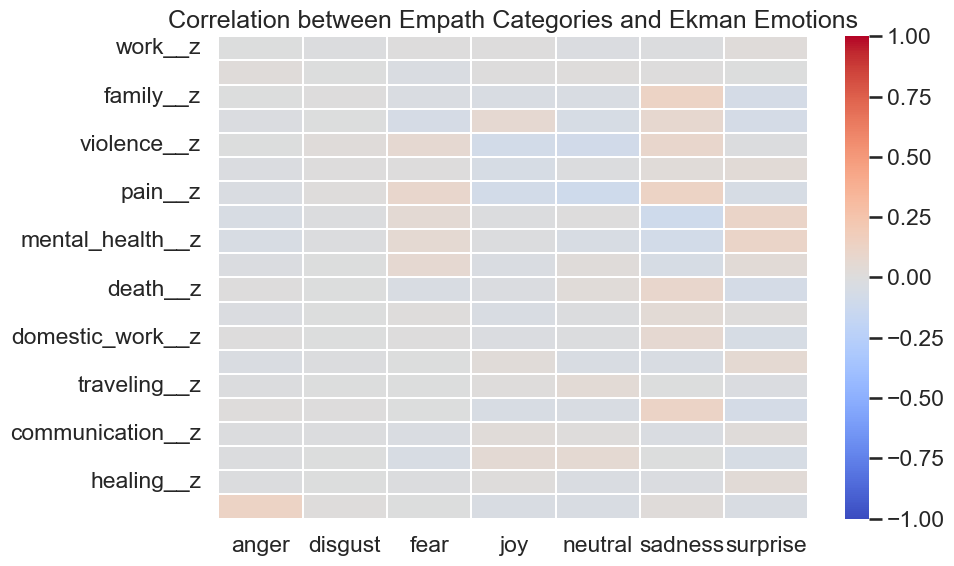

In [61]:
corr_df = df[empath_z_cols].join(ekman_dummies)

corr = corr_df.corr().loc[empath_z_cols, ekman_dummies.columns]

plt.figure(figsize=(10, max(6, len(empath_z_cols)*0.25)))
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.3)
plt.title("Correlation between Empath Categories and Ekman Emotions")
plt.tight_layout()
plt.show()


In [62]:
mean_z = df[empath_z_cols].mean().sort_values(ascending=False)
top10 = mean_z.head(10)

prevalence = (df[top10.index] > 0).mean()

table = pd.DataFrame({
    "Category": top10.index.str.replace("_z",""),
    "Mean_z": top10.values,
    "Prevalence": prevalence.values
})

print(table)

print(
    table.to_latex(
        index=False,
        float_format="%.2f",
        caption="Top 10 Psycholinguistic Stressor Categories Identified by Empath",
        label="tab:empath_top10"
    )
)


         Category        Mean_z  Prevalence
0           work_  5.777190e-17    0.297514
1           pain_  5.158205e-17    0.381307
2        neglect_  5.158205e-17    0.254374
3      traveling_  4.951877e-17    0.312795
4  domestic_work_  3.352833e-17    0.291815
5         family_  1.753790e-17    0.312432
6         injury_  1.650626e-17    0.300309
7        friends_  1.031641e-17    0.349201
8         health_  1.031641e-17    0.336461
9        healing_  9.284769e-18    0.314338
\begin{table}
\centering
\caption{Top 10 Psycholinguistic Stressor Categories Identified by Empath}
\label{tab:empath_top10}
\begin{tabular}{lrr}
\toprule
      Category &  Mean\_z &  Prevalence \\
\midrule
         work\_ &    0.00 &        0.30 \\
         pain\_ &    0.00 &        0.38 \\
      neglect\_ &    0.00 &        0.25 \\
    traveling\_ &    0.00 &        0.31 \\
domestic\_work\_ &    0.00 &        0.29 \\
       family\_ &    0.00 &        0.31 \\
       injury\_ &    0.00 &        0.30 \\
      f

/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/3359446409.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex(


In [70]:
import pandas as pd

# Empath stressor features you care about (raw, not *_z)
stressors_raw = [
    "work", "pain", "neglect", "traveling", "domestic_work",
    "family", "injury", "friends", "health", "healing"
]

rows = []
for col in stressors_raw:
    mean_score = df[col].mean()
    prevalence = (df[col] > 0).mean()
    rows.append({
        "Category": col.rstrip("_"),
        "Mean_score": mean_score,
        "Prevalence": prevalence
    })

empath_top = (
    pd.DataFrame(rows)
      .sort_values("Mean_score", ascending=False)
      .head(10)
)

print(empath_top)
print(
    empath_top.to_latex(
        index=False,
        float_format="%.2f",
        caption="Top 10 Psycholinguistic Stressor Categories Identified by Empath",
        label="tab:empath_top10"
    )
)


        Category  Mean_score  Prevalence
8         health    0.013943    0.642033
1           pain    0.012715    0.717459
7        friends    0.007674    0.582777
5         family    0.006567    0.509147
6         injury    0.005164    0.480581
0           work    0.004965    0.468240
9        healing    0.004318    0.479437
3      traveling    0.003808    0.464356
4  domestic_work    0.003672    0.403848
2        neglect    0.003006    0.367514
\begin{table}
\centering
\caption{Top 10 Psycholinguistic Stressor Categories Identified by Empath}
\label{tab:empath_top10}
\begin{tabular}{lrr}
\toprule
     Category &  Mean\_score &  Prevalence \\
\midrule
       health &        0.01 &        0.64 \\
         pain &        0.01 &        0.72 \\
      friends &        0.01 &        0.58 \\
       family &        0.01 &        0.51 \\
       injury &        0.01 &        0.48 \\
         work &        0.00 &        0.47 \\
      healing &        0.00 &        0.48 \\
    traveling &        0

/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/91666542.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  empath_top.to_latex(


In [72]:
rows = []
for col in df:   # e.g. ['work__z','pain__z',...]
    mean_abs_z = df[col].abs().mean()
    prevalence = (df[col.replace("__z","_")] > 0).mean()
    rows.append({
        "Category": col.replace("__z",""),
        "Mean_abs_z": mean_abs_z,
        "Prevalence": prevalence
    })


TypeError: bad operand type for abs(): 'str'

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.0)

# ---------------------------------------------------
# 1) Load Reddit + BeyondBlue Empath outputs
#    (CHANGE THE FILENAMES to your actual CSVs)
# ---------------------------------------------------
reddit = pd.read_csv("empath_stressors_only.csv")
bb     = pd.read_csv("bb_empath_stressors_only.csv")

reddit["platform"] = "Reddit"
bb["platform"]     = "BeyondBlue"

combined = pd.concat([reddit, bb], ignore_index=True)
combined.shape


/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_2786/1600535449.py:12: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit = pd.read_csv("empath_stressors_only.csv")


(55100, 66)

In [74]:
stressor_cols = [
    "work", "pain", "neglect", "traveling", "domestic_work",
    "family", "injury", "friends", "health", "healing",
    "mental_health", "death", "help_seeking", "communication",
    "social_media", "money", "home", "medical_emergency",
    "violence", "swearing_terms"
]

# Keep only the columns we care about
empath = combined[["platform"] + stressor_cols].copy()


In [75]:
# Mean Empath score per post (0–1 range if Empath output is normalised)
mean_score = empath[stressor_cols].mean()

# Prevalence = proportion of posts where the category appears at least once
prevalence = (empath[stressor_cols] > 0).mean()

top10 = (
    pd.DataFrame({
        "Category": mean_score.index,
        "Mean_score": mean_score.values,
        "Prevalence": prevalence.values
    })
    .sort_values("Mean_score", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# Make the numbers readable for table/plot
top10["Mean_score"] = top10["Mean_score"].round(3)
top10["Prevalence"] = (100 * top10["Prevalence"]).round(1)  # percentage

top10


,Category,Mean_score,Prevalence
0,health,0.014,64.2
1,pain,0.013,71.7
2,violence,0.012,72.0
3,communication,0.009,63.6
4,friends,0.008,58.3
5,mental_health,0.007,49.0
6,death,0.007,52.6
7,family,0.007,50.9
8,medical_emergency,0.006,50.1
9,home,0.005,46.7


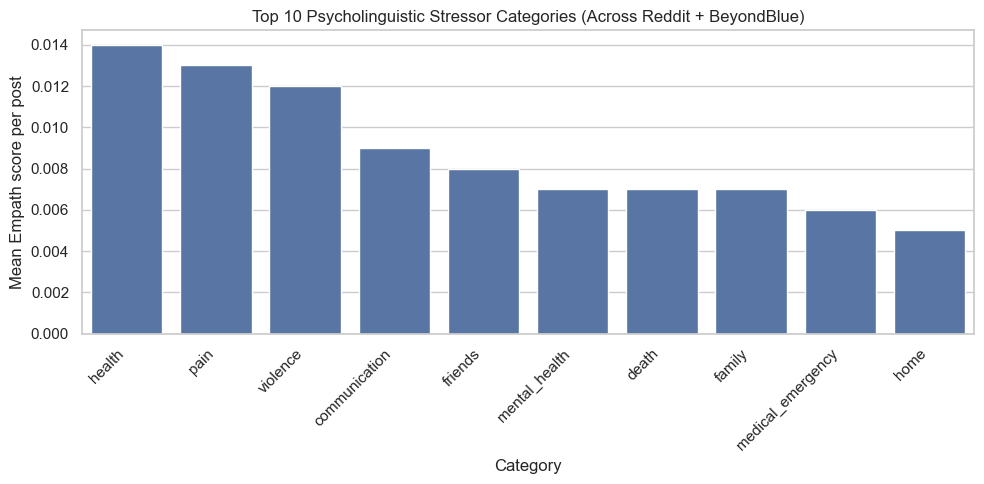

In [76]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10,
    x="Category",
    y="Mean_score"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean Empath score per post")
plt.xlabel("Category")
plt.title("Top 10 Psycholinguistic Stressor Categories (Across Reddit + BeyondBlue)")
plt.tight_layout()
plt.show()


In [77]:
# Mean Empath score per platform
platform_means = (
    empath
    .groupby("platform")[stressor_cols]
    .mean()
    .T   # categories as rows, platforms as columns
)

# Z-score across the two platforms for each category (row-wise)
platform_means_z = platform_means.apply(
    lambda row: (row - row.mean()) / (row.std(ddof=0) + 1e-8),
    axis=1
)

platform_means_z.head()


platform,BeyondBlue,Reddit
work,-0.999980,0.999980
pain,-0.999996,0.999996
neglect,-0.999952,0.999952
traveling,0.999901,-0.999901
domestic_work,-0.999989,0.999989


In [79]:
ekman_col = "predicted_ekman_emotion"   # change if your name is different

ekman_dummies = pd.get_dummies(combined[ekman_col])

# Correlation between Empath features and Ekman one-hot labels
corr = (
    empath[stressor_cols]
    .join(ekman_dummies)
    .corr()
    .loc[stressor_cols, ekman_dummies.columns]
)

corr.round(2)


,anger,disgust,fear,joy,neutral,sadness,surprise
work,-0.00,-0.01,0.00,-0.01,-0.01,-0.01,0.03
pain,-0.01,0.02,0.10,-0.13,-0.10,0.14,-0.03
neglect,-0.02,-0.01,0.01,-0.04,-0.01,0.04,0.01
traveling,-0.01,-0.01,-0.01,0.02,0.04,-0.01,-0.02
domestic_work,0.01,0.00,0.01,-0.05,-0.01,0.08,-0.04
family,0.00,0.00,-0.02,-0.05,-0.03,0.14,-0.06
injury,-0.01,0.01,0.01,-0.08,0.00,0.04,0.04
friends,-0.02,-0.00,-0.05,0.05,-0.05,0.08,-0.06
health,-0.04,-0.01,0.04,-0.03,0.01,-0.10,0.13
healing,-0.01,-0.01,-0.01,0.01,-0.03,-0.02,0.04


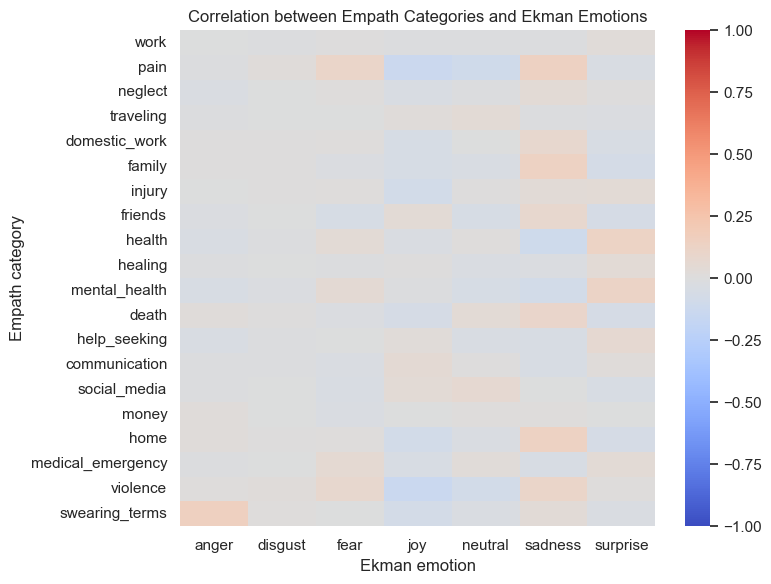

: 

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,
    annot=False
)
plt.title("Correlation between Empath Categories and Ekman Emotions")
plt.ylabel("Empath category")
plt.xlabel("Ekman emotion")
plt.tight_layout()
plt.show()
